In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn import cluster, datasets, preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

## Logistic Regression

In [2]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [4]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [5]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

### 1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

# Define thresholds to try
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Evaluate different thresholds
for threshold in thresholds:
    # Convert probabilities to binary predictions using the threshold
    predictions = (probs >= threshold).astype(int)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Threshold: 0.30, Accuracy: 0.79, Precision: 0.60, Recall: 0.75
Threshold: 0.40, Accuracy: 0.84, Precision: 0.73, Recall: 0.67
Threshold: 0.50, Accuracy: 0.86, Precision: 0.88, Recall: 0.58
Threshold: 0.60, Accuracy: 0.81, Precision: 0.83, Recall: 0.42
Threshold: 0.70, Accuracy: 0.81, Precision: 1.00, Recall: 0.33


### 2. Do the same analysis for other columns

In [7]:
#elements
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X = np.array(glass[ele]).reshape(-1,1)
    y = glass.household
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Define thresholds to try
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        predictions = (probs >= threshold).astype(int)
        
        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        
        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Element:RI, Threshold: 0.30, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.30, Accuracy: 0.84, Precision: 0.73, Recall: 0.67
Element:Na, Threshold: 0.40, Accuracy: 0.86, Precision: 0.80, Recall: 0.67
Element:Na, Threshold: 0.50, Accuracy: 0.81, Precision: 0.83, Recall: 0.42
Element:Na, Threshold: 0.60, Accuracy: 0.79, Precision: 0.80, Recall: 0.33
Element:Na, Threshold: 0.70, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:Mg, Threshold: 0.30, Accuracy: 0.88, Precision: 0.82, Recall: 0.75
Element:Mg, Threshold: 0.40, Accuracy: 0.86, Precision: 0.80, Recall: 0.67
Element:Mg, Threshold: 0.50, Accuracy: 0.86, Precision: 0.80, Recall: 0.67
Element:Mg, Threshold: 0.

### 3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

In [8]:
#elements
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X = np.array(glass[ele]).reshape(-1,1)
    y = glass.household
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Define thresholds to try
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        predictions = (probs >= threshold).astype(int)
        
        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        
        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Element:RI, Threshold: 0.30, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.30, Accuracy: 0.84, Precision: 0.73, Recall: 0.67
Element:Na, Threshold: 0.40, Accuracy: 0.86, Precision: 0.80, Recall: 0.67
Element:Na, Threshold: 0.50, Accuracy: 0.81, Precision: 0.83, Recall: 0.42
Element:Na, Threshold: 0.60, Accuracy: 0.79, Precision: 0.80, Recall: 0.33
Element:Na, Threshold: 0.70, Accuracy: 0.72, Precision: 0.00, Recall: 0.00
Element:Mg, Threshold: 0.30, Accuracy: 0.88, Precision: 0.82, Recall: 0.75
Element:Mg, Threshold: 0.40, Accuracy: 0.86, Precision: 0.80, Recall: 0.67
Element:Mg, Threshold: 0.50, Accuracy: 0.86, Precision: 0.80, Recall: 0.67
Element:Mg, Threshold: 0.

### 4. Plot ROC Curves for each model

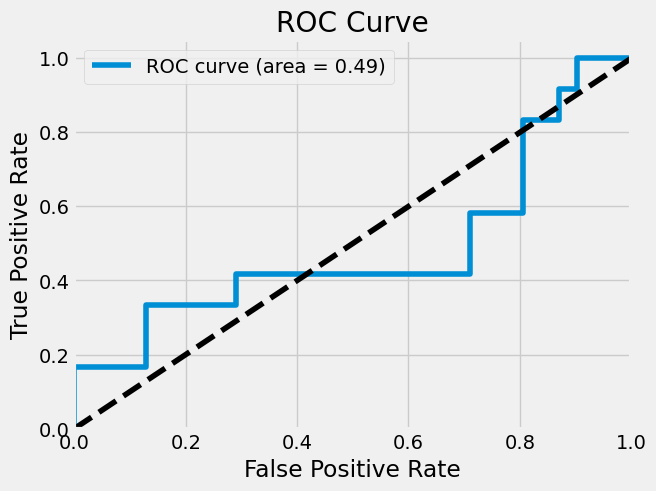

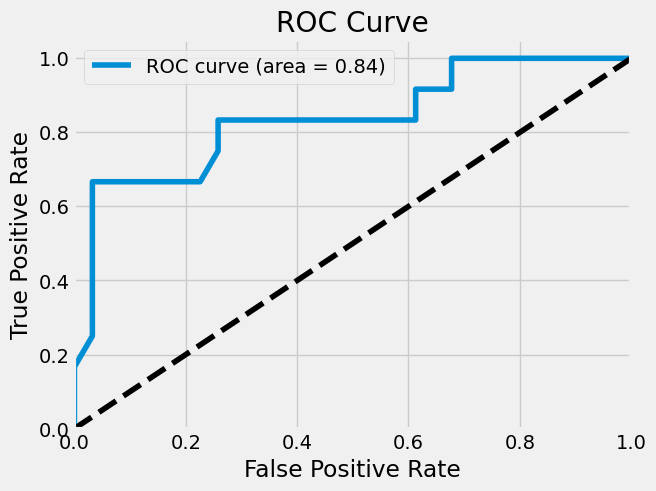

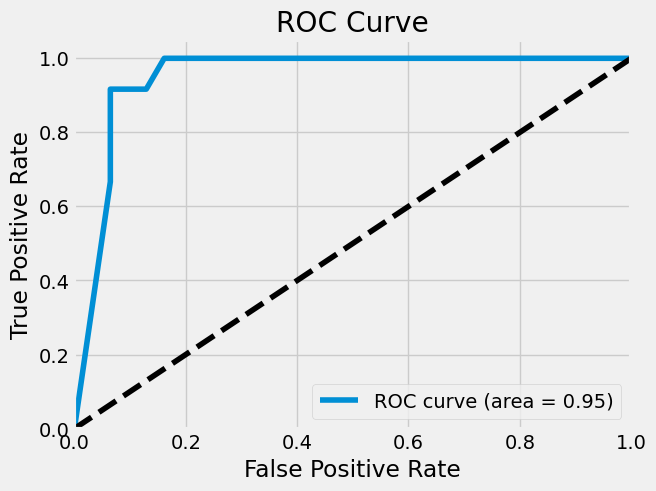

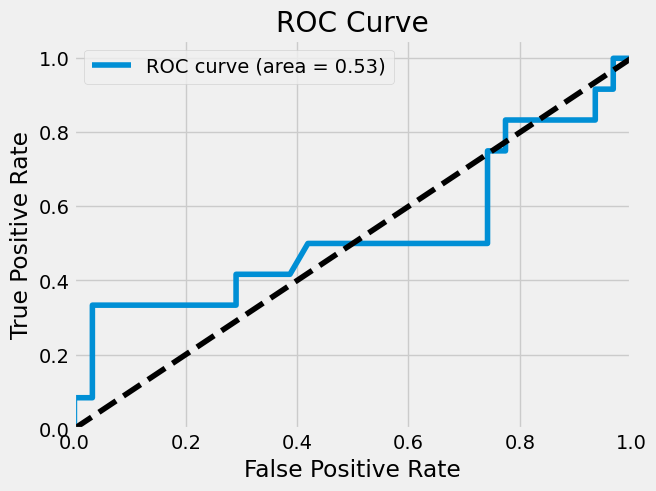

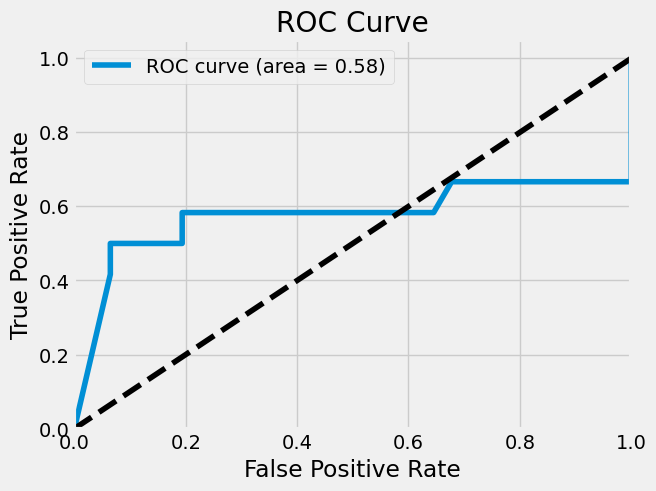

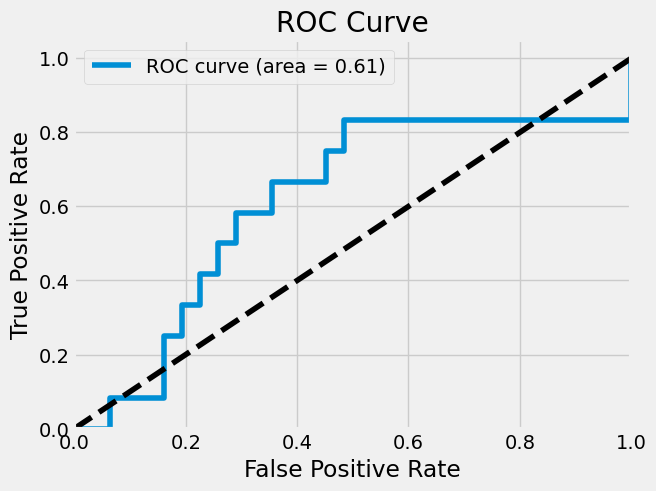

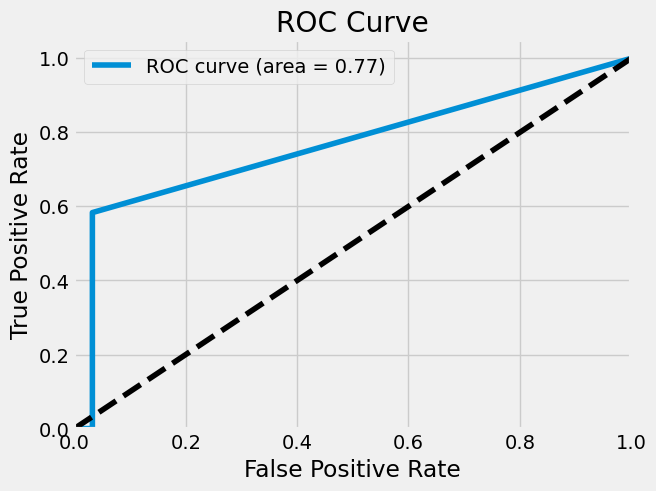

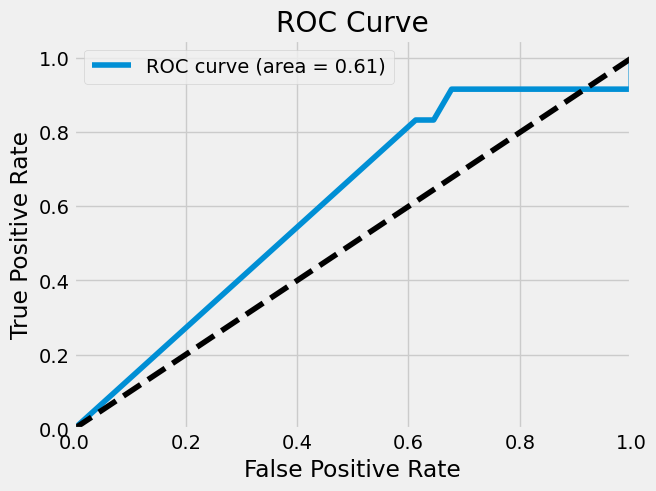

In [9]:
#elements
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X = np.array(glass[ele]).reshape(-1,1)
    y = glass.household
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, probs) 
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

## Clustering

In [10]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
cols = df.columns[:-1]
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

### 1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?

In [12]:
score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

Text(0, 0.5, 'Score')

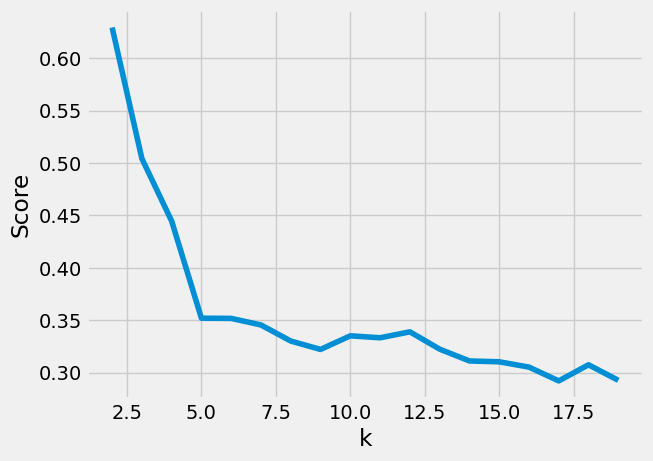

In [13]:
plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

In [14]:
inertia_score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

Text(0, 0.5, 'Inertia')

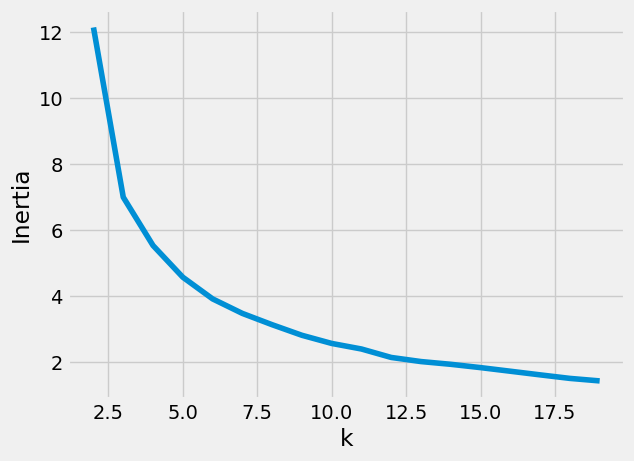

In [15]:
plt.plot(list(range(2,20)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')